Here I plot new figures for regularized model

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

import os
import pickle 

Show exponential function used for adaptation

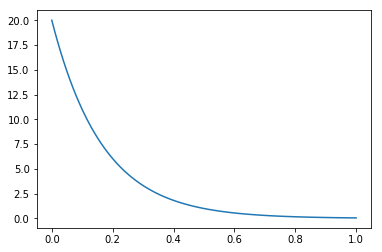

In [2]:
p=np.linspace(0,1,100)
def eta(p,eta_plus):
    return np.exp(-2*np.log(eta_plus)*(p-1/2))
plt.plot(p,eta(p,20))
plt.show()

In [3]:
def get_scalar_summary(path, tag):
    for file in os.listdir(path):
        l=[]
        event_file_path=os.path.join(path, file)
        for e in tf.train.summary_iterator(event_file_path):
            for v in e.summary.value:
                if v.tag == tag:
                    l.append(v.simple_value)
    return l

In [4]:
cluster="/run/user/6731/gvfs/smb-share:server=files.cluster.is.localnet,share=azadaianchuk/"

### Figure 1. RPROP accuracy and loss

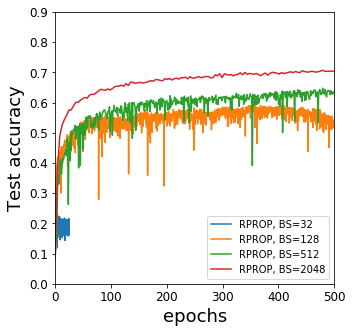

In [60]:
model_name ="cifar10_3c3d"
batch_sizes = [32,128, 512, 2048]
Ns={32:400000,128:200000,512:100000,2048:25000}
every=100
ts = {bs: range(0,Ns[bs]+1,every) for bs in batch_sizes}
ts[32]=ts[32][:395]
fig=plt.figure(figsize=(5,5))
epochs ={}
for bs in batch_sizes:
    epochs[bs]=[x*bs/50000 for x in ts[bs]]
    
#add accuracy 
ax=fig.add_subplot(1,1,1)
ax.set_ylabel("Test accuracy", fontsize=18)
ax.set_xlabel("epochs", fontsize=18)
tag = 'checkpoint_test_acc'

path_rprop = cluster+"tflogs_reg_for_report5/"+model_name+"/"+model_name+"__RPROP__bs_{0}"\
             "__delta_0_5E-04__delta_min_1E-09__delta_max_5E-01__"\
             "eta_minus_0.5__eta_plus_2.0__N_{1}__MNS_True__UME_False__seed_42"
    
path_rprop2 = cluster+"tflogs_reg_for_report5/"+model_name+"/"+model_name+"__RPROP__bs_{0}"\
             "__delta_0_5E-04__delta_min_1E-08__delta_max_5E-01__"\
             "eta_minus_0.5__eta_plus_2.0__N_{1}__MNS_True__UME_False__seed_42"
for bs in batch_sizes:
    if bs == 2048:
        path = path_rprop2.format(bs,Ns[bs])
    else:    
        path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    ax.plot(epochs[bs],l,label="RPROP, BS=" + str(bs))
    
ax.legend()
ax.set_ylim([0,0.9])
ax.set_xlim([0,500])
ax.tick_params(labelsize=12)
fig.savefig("../report/reg_fig6_RPROP.pdf",  transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

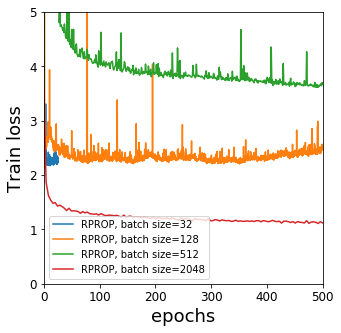

In [62]:
model_name ="cifar10_3c3d"
batch_sizes = [32,128, 512, 2048]
Ns={32:400000,128:200000,512:100000,2048:25000}
every=100
ts = {bs: range(0,Ns[bs]+1,every) for bs in batch_sizes}
ts[32]=ts[32][:395]
epochs ={}
for bs in batch_sizes:
    epochs[bs]=[x*bs/50000 for x in ts[bs]]
    
    
fig=plt.figure(figsize=(5,5))
#add accuracy 
ax=fig.add_subplot(1,1,1)
ax.set_ylabel("Train loss", fontsize=18)
ax.set_xlabel("epochs", fontsize=18)
tag = 'checkpoint_train_loss'

path_rprop = cluster+"tflogs_reg_for_report5/"+model_name+"/"+model_name+"__RPROP__bs_{0}"\
             "__delta_0_5E-04__delta_min_1E-09__delta_max_5E-01__"\
             "eta_minus_0.5__eta_plus_2.0__N_{1}__MNS_True__UME_False__seed_42"
    
path_rprop2 = cluster+"tflogs_reg_for_report5/"+model_name+"/"+model_name+"__RPROP__bs_{0}"\
             "__delta_0_5E-04__delta_min_1E-08__delta_max_5E-01__"\
             "eta_minus_0.5__eta_plus_2.0__N_{1}__MNS_True__UME_False__seed_42"
for bs in batch_sizes:
    if bs == 2048:
        path = path_rprop2.format(bs,Ns[bs])
    else:    
        path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    ax.plot(epochs[bs],l,label="RPROP, batch size=" + str(bs))

    
ax.legend()
ax.set_ylim([0,5])
ax.set_xlim([0,500])

ax.tick_params(labelsize=12)
fig.savefig("../report/reg_fig1_cifar10_loss.pdf",  transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

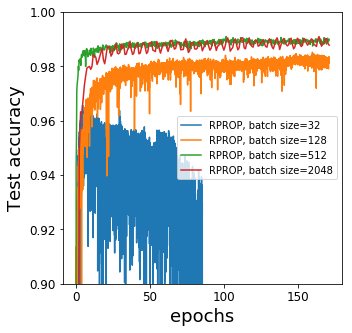

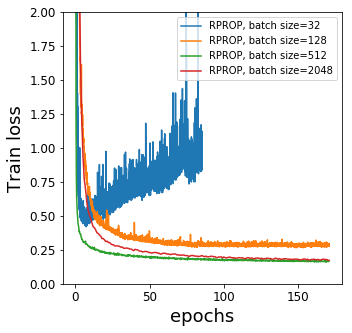

In [81]:
model_name ="mnist_2c2d"
batch_sizes = [ 32, 128,512, 2048]
Ns={32:160000,128:80000,512:20000,2048:5000}
every=25
ts = {bs: range(0,Ns[bs]+1,every) for bs in batch_sizes}

epochs ={}
for bs in batch_sizes:
    epochs[bs]=[x*bs/60000 for x in ts[bs]]

#add accuracy 
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.set_ylabel("Test accuracy", fontsize=18)
ax.set_xlabel("epochs", fontsize=18)
tag = 'checkpoint_test_acc'

path_rprop = cluster+"tflogs_reg_for_report5/"+model_name+"/"+model_name+"__RPROP__bs_{0}"\
             "__delta_0_5E-04__delta_min_1E-09__delta_max_5E-01__eta_minus_0.5__eta_plus_2.0__N_{1}"\
             "__MNS_True__UME_False__seed_43/"
for bs in batch_sizes:
    path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    ax.plot(epochs[bs],l,label="RPROP, batch size=" + str(bs))
    
# path="tflogs_for_report/"+model_name+"/"+model_name+"__momentum__bs_128__mu_9.9E-01__lr_1E-04__seed_42/"
# l = get_scalar_summary(path, tag)
# line=ax.plot(ts[128],l, '--y',   label="momentum, batch size=128" )
ax.legend()
ax.tick_params(labelsize=12)
plt.ylim(0.9,1.0)
fig.savefig("../report/reg_fig1_mnist_acc.pdf",  transparent = True, bbox_inches = 'tight', pad_inches = 0)
# Train and test loss start increasing at some point. Sometimes the increase is so large that it reduce the test accuracy.
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.set_ylabel("Train loss", fontsize=18)
ax.set_xlabel("epochs", fontsize=18)
tag="checkpoint_train_loss"
for bs in batch_sizes:
    path = path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    line=ax.plot(epochs[bs],l,  label="RPROP, batch size=" + str(bs))
# path="tflogs_for_report/"+model_name+"/"+model_name+"__momentum__bs_128__mu_9.9E-01__lr_1E-04__seed_43/"
# l = get_scalar_summary(path, tag)
# line=ax.plot(ts[128],l,'--y',   label="momentum, batch size=128")
ax.legend()
ax.tick_params(labelsize=12)
plt.ylim([0,2])
fig.savefig("../report/reg_fig1_mnist_loss.pdf",  transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

### Figure 3. Interval ProbRPROP

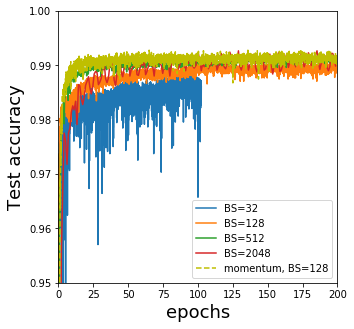

In [99]:
model_name ="mnist_2c2d"
batch_sizes = [32, 128, 512, 2048]
Ns={32:160000,128:80000,512:20000,2048:5000}
every=25
ts = {bs: range(0,Ns[bs]+1,every) for bs in batch_sizes}

epochs ={}
for bs in batch_sizes:
    epochs[bs]=[x*bs/50000 for x in ts[bs]]
    

fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.set_ylabel("Test accuracy", fontsize=18)
ax.set_xlabel("epochs", fontsize=18)
tag = 'checkpoint_test_acc'

path_rprop = cluster+"tflogs_reg__for_report8/"+model_name+"/"+model_name+"__ProbRPROP__bs_{0}"\
             "__delta_0_5E-04__delta_min_1E-09__delta_max_5E-01__p_min_0.25__"\
            "eta_minus_0.444__eta_plus_2.25__eta_type_interval__N_{1}__UME_False__SOFT_True__seed_42"
    
for bs in batch_sizes:
    path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    ax.plot(epochs[bs],l,label="BS=" + str(bs))
path=cluster+"tflogs_reg__for_report8/"+model_name+"/"+model_name+"__momentum__bs_128__mu_9.9E-01__lr_5E-04__seed_42/"
l = get_scalar_summary(path, tag)
line=ax.plot([x*128/50000 for x in range(0,80000+1,every)] ,l, '--y',   label="momentum, BS=128" ,  ) 
plt.xlim([0,200])    
plt.ylim([0.95,1.00])
ax.legend()
fig.savefig("../report/mnist_reg_fig7_int.pdf",  transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

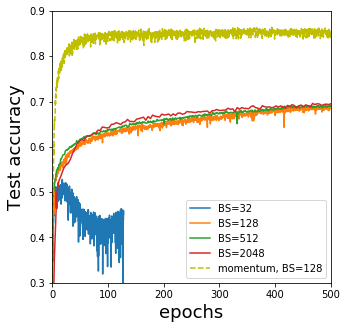

In [74]:
model_name ="cifar10_3c3d"
batch_sizes = [32, 128, 512, 2048]
Ns={32:200000,128:200000,512:200000,2048:50000}
every=100
ts = {bs: range(0,Ns[bs]+1,every) for bs in batch_sizes}

epochs ={}
for bs in batch_sizes:
    epochs[bs]=[x*bs/50000 for x in ts[bs]]
    

fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.set_ylabel("Test accuracy", fontsize=18)
ax.set_xlabel("epochs", fontsize=18)
tag = 'checkpoint_test_acc'

path_rprop = cluster+"tflogs_reg__for_report8/"+model_name+"/"+model_name+"__ProbRPROP__bs_{0}"\
             "__delta_0_5E-04__delta_min_1E-09__delta_max_5E-01__p_min_0.25__"\
            "eta_minus_0.33__eta_plus_2.25__eta_type_interval__N_{1}__UME_False__SOFT_True__seed_42"
    
for bs in batch_sizes:
    path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    ax.plot(epochs[bs],l,label="BS=" + str(bs))
    path="../tflogs_for_report/tflogs_for_report4/"+model_name+"/"+model_name+"__momentum__bs_128__mu_9.9E-01__lr_5E-04__seed_42/"
l = get_scalar_summary(path, tag)
line=ax.plot([x*128/50000 for x in range(0,200000+1,every)] ,l, '--y',   label="momentum, BS=128" ,  ) 
plt.xlim([0,500])    
plt.ylim([0.3,0.9])
ax.legend()
fig.savefig("../report/reg_fig7_int.pdf",  transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

### Figure 4. Exponential ProbRPROP

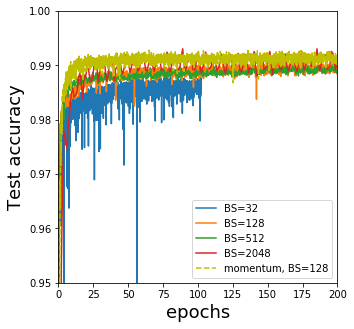

In [102]:
model_name ="mnist_2c2d"
batch_sizes = [32, 128, 512, 2048]
Ns={32:160000,128:80000,512:20000,2048:5000}
every=25
ts = {bs: range(0,Ns[bs]+1,every) for bs in batch_sizes}

epochs ={}
for bs in batch_sizes:
    epochs[bs]=[x*bs/50000 for x in ts[bs]]
    

fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.set_ylabel("Test accuracy", fontsize=18)
ax.set_xlabel("epochs", fontsize=18)
tag = 'checkpoint_test_acc'

path_rprop = cluster+"tflogs_reg__for_report8/"+model_name+"/"+model_name+"__ProbRPROP__bs_{0}"\
             "__delta_0_5E-04__delta_min_1E-09__delta_max_5E-01__p_min_0.25__"\
            "eta_minus_0.444__eta_plus_2.25__eta_type_exponential__N_{1}__UME_False__SOFT_True__seed_42"
    
for bs in batch_sizes:
    path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    ax.plot(epochs[bs],l,label="BS=" + str(bs))
path=cluster+"tflogs_reg__for_report8/"+model_name+"/"+model_name+"__momentum__bs_128__mu_9.9E-01__lr_5E-04__seed_42/"
l = get_scalar_summary(path, tag)
line=ax.plot([x*128/50000 for x in range(0,80000+1,every)] ,l, '--y',   label="momentum, BS=128" ,  ) 
plt.xlim([0,200])    
plt.ylim([0.95,1.00])
ax.legend()
fig.savefig("../report/mnist_reg_fig7_exp.pdf",  transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

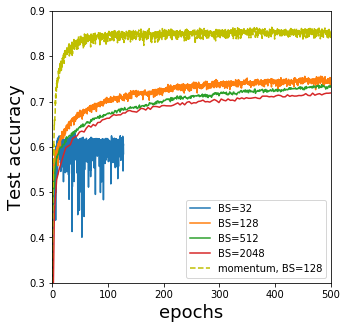

In [68]:
model_name ="cifar10_3c3d"
batch_sizes = [32, 128, 512, 2048]
Ns={32:200000,128:200000,512:200000, 2048:50000}
every=100
ts = {bs: range(0,Ns[bs]+1,every) for bs in batch_sizes}

epochs ={}
for bs in batch_sizes:
    epochs[bs]=[x*bs/50000 for x in ts[bs]]
    
fig=plt.figure(figsize=(5,5))
#add accuracy 
ax=fig.add_subplot(1,1,1)
ax.set_ylabel("Test accuracy", fontsize=18)
ax.set_xlabel("epochs", fontsize=18)
tag = 'checkpoint_test_acc'

path_rprop = cluster+"tflogs_reg_for_report3/"+model_name+"/"+model_name+"__ProbRPROP__bs_{0}"\
             "__delta_0_5E-04__delta_min_1E-08__delta_max_5E-02__p_min_0.25__"\
            "eta_minus_0.33__eta_plus_3.0__eta_type_exponential__N_{1}__UME_False__SOFT_True__seed_42"
    
for bs in batch_sizes:
    path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    ax.plot(epochs[bs],l,label="BS=" + str(bs))

path="../tflogs_for_report/tflogs_for_report4/"+model_name+"/"+model_name+"__momentum__bs_128__mu_9.9E-01__lr_5E-04__seed_42/"
l = get_scalar_summary(path, tag)
line=ax.plot([x*128/50000 for x in range(0,200000+1,every)] ,l, '--y',   label="momentum, BS=128" ,  )   
ax.legend()
ax.set_xlim([0,500])
ax.set_ylim([0.3,0.9])
fig.savefig("../report/reg_fig6_exp.pdf",  transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

### Figure 5. Initial learning rate

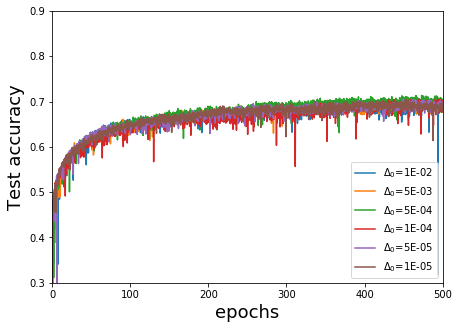

In [79]:
delta_0s=["1E-02","5E-03","5E-04","1E-04","5E-05","1E-05"]

batch_sizes = [128]
Ns={128:200000}
every=100
ts = {bs: range(0,Ns[bs]+1,every) for bs in batch_sizes}
epochs ={}
for bs in batch_sizes:
    epochs[bs]=[x*bs/50000 for x in ts[bs]]

fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(1,1,1)
ax.set_ylabel("Test accuracy", fontsize=18)
ax.set_xlabel("epochs", fontsize=18)
ax.set_xlim([0,500])
ax.set_ylim([0.3,0.9])
tag = 'checkpoint_test_acc'
path_rprop = cluster+"tflogs_reg_for_report6/cifar10_3c3d/cifar10_3c3d__ProbRPROP__bs_128"\
             "__delta_0_{0}__delta_min_1E-09__delta_max_5E-01__p_min_0.25"\
             "__eta_minus_0.5__eta_plus_3.0__eta_type_exponential__N_200000"\
             "__UME_False__SOFT_True__seed_42/"        
for delta_0 in delta_0s:
    path = path_rprop.format(delta_0)
    l = get_scalar_summary(path, tag)
    ax.plot(epochs[128],l,label="$\Delta_0$=" + delta_0)
ax.legend()
fig.savefig("../report/reg_fig5_diff_delta_0.pdf",  transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

### Figure 6. Different $\eta_+$

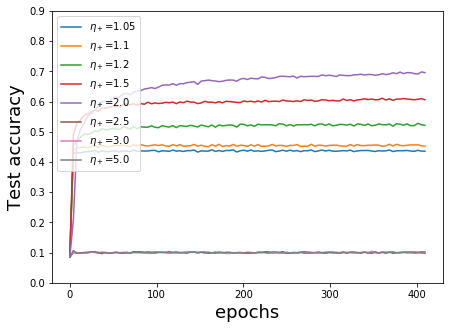

In [80]:
etas = [1.05,1.1,1.2,1.5,2.0,2.5,3.0,5.0]

batch_sizes = [2048]
Ns={2048:10000}
every=100
ts = {bs: range(0,Ns[bs]+1,every) for bs in batch_sizes}
epochs ={}
for bs in batch_sizes:
    epochs[bs]=[x*bs/50000 for x in ts[bs]]

fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(1,1,1)
ax.set_ylabel("Test accuracy", fontsize=18)
ax.set_xlabel("epochs", fontsize=18)
# ax.set_xlim([0,500])
ax.set_ylim([0.0,0.9])
tag = 'checkpoint_test_acc'

path_rprop = cluster+"tflogs_reg_for_report4/"+"cifar10_3c3d/cifar10_3c3d__RPROP__bs_2048__delta_0_5E-04__delta_min_1E-09__delta_max_5E-01"\
"__eta_minus_0.5__eta_plus_{0}__N_10000__MNS_True__UME_False__seed_42"        
for eta in etas:
    path = path_rprop.format(eta)
    l = get_scalar_summary(path, tag)
    ax.plot(epochs[2048],l,label="$\eta_+$=" + str(eta))
ax.legend()
fig.savefig("../report/reg_fig9_diff_eta.pdf",  transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()